# How to use the SSA for cell-cycle model

In this notebook we show how to use the SSA for the delayed telegraph to produce Monte Carlo trajectories and histograms.

The model is made up of 7 parameters:
- $\rho$, the rate at which the (on) gene produces nascent RNA (nRNA).
- $\sigma_{on}$, the rate at which the gene switches on.
- $\sigma_{off}$, the rate at which the gene switches off.
- $\tau$, the fixed time it takes for the nRNA to complete transcription (and fall off the DNA).
- $\kappa$, the gene dosage complensation, a fraction $\in [0,1]$ that scales $\rho$ after gene replication.
- $k$, the rate at which exponentially distributed periods of the cell cycle pass.
- $N$, the number of exponentially distributed cell cycle stages.

Note that in the simulation code we account for the nRNA produced by the mother and daughter gene separately, and at cell division follow one of these gene copies with probability 1/2. The new daughter cell then has one gene copy, whose initial state and number of nRNA present are inherited from the previous cycle.

## Usage

In [1]:
include("./DSSA-delayed-telegraph.jl"); using .SSAdelayedtelegraph;

Import some necessary packages for plotting and saving data.

In [2]:
using PyPlot, DelimitedFiles, LaTeXStrings;

Now, let's define:
- `par_set`: the set of parameter for which we want to simulate in order $\{\rho,\sigma_{off},\sigma_{on}\}$.
- `τ`: the deterministic delay time of the transition from nascent to mature RNA.
- `total_time`: the total time of the simulation.
- `sp`: the sampling period of the SSA (how often the state vector is stored). Total number of data points stored will be $=$`total_time/sp`.
- `sims`: the number of independent DSSA trajectories. If equal to 1 only a single DSSA trajectory will be produced.

The initial conditions of the SSA are to start in gene state $U^{**}$ with zero $N$ and $M$.

In [19]:
par_set = [2.11,0.609,0.0282]; # params should be float64.
τ = 150.0; # must be float64.
total_time = 1000000.0; # must be float64.
sp = 1.0; # must be float64.
sims = 1; # take a single trajectory. Must be integer.

In [20]:
# simulate
@time data=SSAdt(sims, par_set, τ, total_time, sp);

# take the individual trajectories of each species.
n_traj = data[2,1,:]; g_0 = data[1,1,:];
g_1 = 1 .- data[1,1,:];
# save n and m traj to file
writedlm("delayTMtest-bimod-N.csv",n_traj[1:end])

  1.397758 seconds (31.94 M allocations: 800.549 MiB, 7.30% gc time)


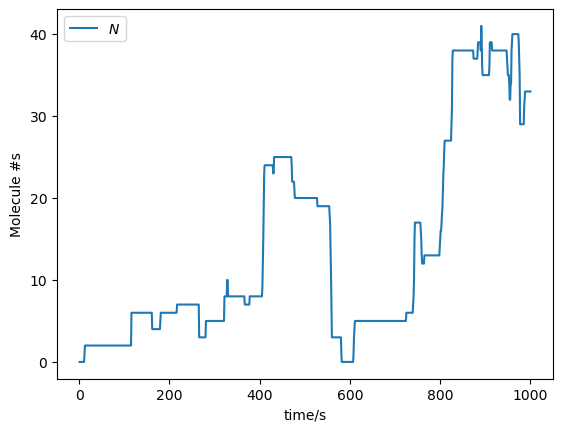

In [21]:
# plot first 1000 sample points
time = [sp*i for i in 1:1000];
PyPlot.plot(time,n_traj[1:1000], label = L"$N$");
PyPlot.legend(); PyPlot.xlabel("time/s"); PyPlot.ylabel("Molecule #s")
PyPlot.show()

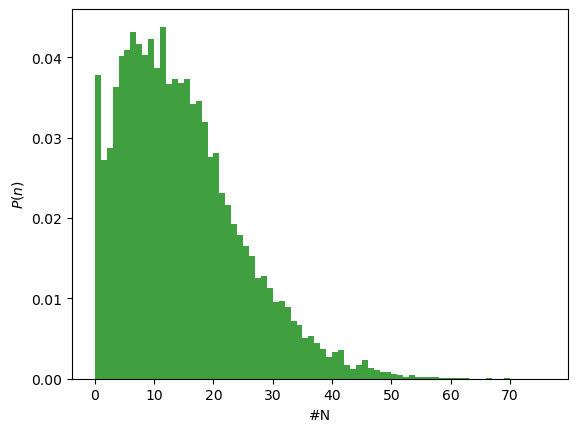

In [22]:
# plot historgram 
n_bins = floor(Int,maximum(n_traj));
PyPlot.xlabel("#N"); PyPlot.ylabel(L"P(n)");
PyPlot.hist(n_traj[floor(Int,total_time/(2*sp)):end], bins=n_bins, facecolor= "g", alpha=0.75, density=true);

In [ ]:
# Testing SSA for delayed telegraph model

In this notebook we show how to use the SSA for the delayed telegraph to produce probability distributions and histograms.

## Usage

include("./DSSA-delayed-telegraph.jl"); using .SSAdelayedtelegraph;

Import some necessary packages for plotting and saving data.

using PyPlot, DelimitedFiles, LaTeXStrings;

Now, let's define:
- `par_set`: the set of parameter for which we want to simulate in order $\{\rho,\sigma_{off},\sigma_{on}\}$.
- `τ`: the deterministic delay time of the transition from nascent to mature RNA.
- `total_time`: the total time of the simulation.
- `sp`: the sampling period of the SSA (how often the state vector is stored). Total number of data points stored will be $=$`total_time/sp`.
- `sims`: the number of independent DSSA trajectories. If equal to 1 only a single DSSA trajectory will be produced.

The initial conditions of the SSA are to start in gene state $U^{**}$ with zero $N$ and $M$.

par_set = [2.11,0.609,0.0282]; # params should be float64.
τ = 150.0; # must be float64.
total_time = 1000000.0; # must be float64.
sp = 1.0; # must be float64.
sims = 1; # take a single trajectory. Must be integer.

# simulate
@time data=SSAdt(sims, par_set, τ, total_time, sp);

# take the individual trajectories of each species.
n_traj = data[2,1,:]; g_0 = data[1,1,:];
g_1 = 1 .- data[1,1,:];
# save n and m traj to file
writedlm("delayTMtest-bimod-N.csv",n_traj[1:end])

# plot first 1000 sample points
time = [sp*i for i in 1:1000];
PyPlot.plot(time,n_traj[1:1000], label = L"$N$");
PyPlot.legend(); PyPlot.xlabel("time/s"); PyPlot.ylabel("Molecule #s")
PyPlot.show()

# plot historgram 
n_bins = floor(Int,maximum(n_traj));
PyPlot.xlabel("#N"); PyPlot.ylabel(L"P(n)");
PyPlot.hist(n_traj[floor(Int,total_time/(2*sp)):end], bins=n_bins, facecolor= "g", alpha=0.75, density=true);

